In [8]:
import pandas as pd

owid = pd.read_csv("owid-covid-data.csv") #avevi il file nella stessa directory del file jupyter

num_righe, num_colonne = owid.shape
print("Il dataset ha", num_righe, "righe e ha", num_colonne, "colonne")

print("L'intestazione del dataset è:\n", owid.columns.tolist())


Il dataset ha 346567 righe e ha 67 colonne
L'intestazione del dataset è:
 ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'peop

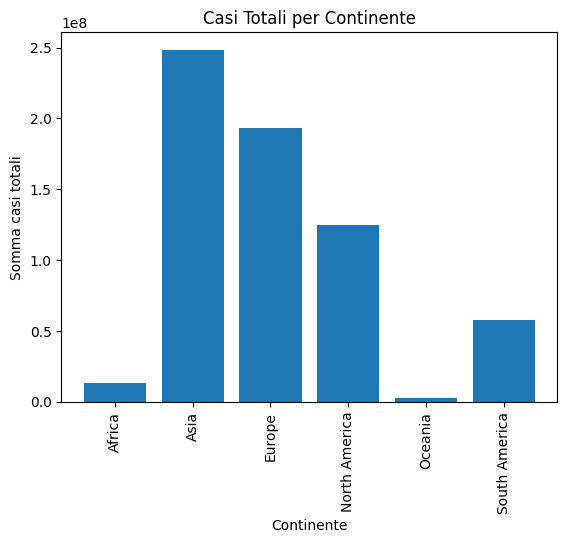

       continent  total_cases_sum
0         Africa       13130847.0
1           Asia      248463111.0
2         Europe      192946260.0
3  North America      124447959.0
4        Oceania        2875960.0
5  South America       57735107.0


In [23]:
raggruppamento_continente = owid.groupby('continent')

riga_di_appoggio = []

# trovo le date più recenti e sommo i dati di total case
for continent, group in raggruppamento_continente:
    for location, location_group in group.groupby('location'):
        most_recent_date = location_group['date'].max()
        most_recent_rows = location_group[location_group['date'] == most_recent_date]
        total_cases_sum = most_recent_rows['total_cases'].sum()
        riga_di_appoggio.append({'continent': continent, 'location': location, 'total_cases_sum': total_cases_sum})


casi_totali_continente_df = pd.DataFrame(riga_di_appoggio)


risultato_finale = casi_totali_continente_df.groupby('continent')['total_cases_sum'].sum().reset_index()

import matplotlib.pyplot as plt
plt.bar(risultato_finale['continent'], risultato_finale['total_cases_sum'])
plt.xlabel("Continente")
plt.ylabel('Somma casi totali')
plt.title('Casi Totali per Continente')
plt.xticks(rotation=90)
plt.show()




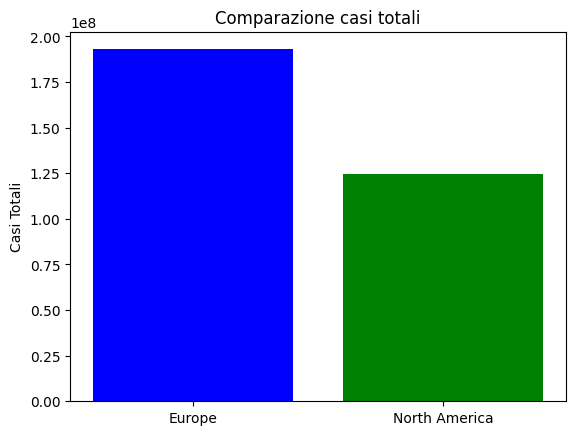

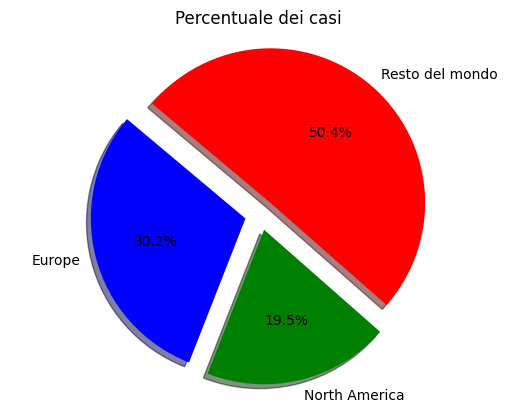

In [65]:
#ho utilizzato parte del programma già scritto
def analisi1(nomedataset, continente1, continente2):
    dataset = pd.read_csv(nomedataset) 
    
    raggruppamento = dataset.groupby('continent')
    riga = []

    for continent, group in raggruppamento:
        for location, location_group in group.groupby('location'):
            most_recent_data = location_group['date'].max()
            most_recent_row = location_group[location_group['date'] == most_recent_data]
            total_case_sum = most_recent_row['total_cases'].sum()
            riga.append({'continent': continent, 'location': location, 'total_cases_sum': total_case_sum})

    casi_totali_per_nazione_df = pd.DataFrame(riga)

    casi_totali_per_continente_df = casi_totali_per_nazione_df.groupby('continent')['total_cases_sum'].sum().reset_index()

    dati_selezionati = casi_totali_per_continente_df[casi_totali_per_continente_df['continent'].isin([continente1, continente2])]

    min_cases = dati_selezionati['total_cases_sum'].min()
    max_cases = dati_selezionati['total_cases_sum'].max()

    total_cases_continente1 = dati_selezionati[dati_selezionati['continent'] == continente1]['total_cases_sum'].iloc[0]
    total_cases_continente2 = dati_selezionati[dati_selezionati['continent'] == continente2]['total_cases_sum'].iloc[0]

    total_cases = casi_totali_continente_df['total_cases_sum'].sum()
    percentage_continent1 = total_cases_continente1 / total_cases
    percentage_continent2 = total_cases_continente2 / total_cases
    remaining = 1 - percentage_continent1 - percentage_continent2
    
    fig, ax = plt.subplots()
    ax.bar([continente1, continente2], [total_cases_continente1, total_cases_continente2], color=['blue', 'green'])
    ax.set_ylabel('Casi Totali')
    ax.set_title('Comparazione casi totali')
    plt.show()

    labels = [continente1, continente2, 'Resto del mondo']
    sizes = [percentage_continent1, percentage_continent2, remaining]
    colors = ['blue', 'green', 'red']  

    
    explode = (0.1, 0.1, 0.1)

  
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Percentuale dei casi')
    plt.show()



analisi1("owid-covid-data.csv", "Europe", "North America")
    

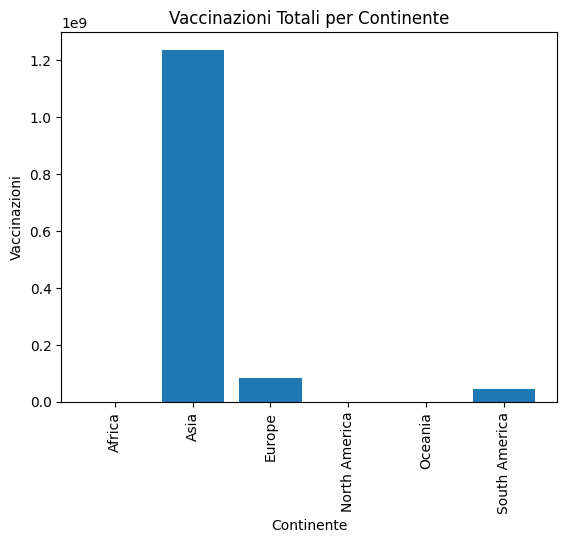

In [74]:
def analisi2(nomedataset) :
    dataset = pd.read_csv(nomedataset)
    raggruppamento = dataset.groupby('continent')
    riga = []

    for continent, group in raggruppamento:
        for location, location_group in group.groupby('location'):
            most_recent_data = location_group['date'].max()
            most_recent_row = location_group[location_group['date'] == most_recent_data]
            total_vaccination_sum = most_recent_row['people_vaccinated'].sum()
            riga.append({'continent': continent, 'location': location, 'people_vaccinated': total_vaccination_sum})

    vaccinazioni_per_nazione_df = pd.DataFrame(riga)

    vaccinazioni_totali_per_continente_df = vaccinazioni_per_nazione_df.groupby('continent')['people_vaccinated'].sum().reset_index()

    plt.bar(vaccinazioni_totali_per_continente_df['continent'], vaccinazioni_totali_per_continente_df['people_vaccinated'])
    plt.xlabel("Continente")
    plt.ylabel('Vaccinazioni')
    plt.title('Vaccinazioni Totali per Continente')
    plt.xticks(rotation=90)
    plt.show()
analisi2("owid-covid-data.csv")



In [ ]:
#Le mie considerazioni sui casi rimangono che fondamentalmente ci sono stati molti casi covid, e a parte una piccola fluttuazione il numero dei casi è rapportato in maniera
#abbastanza costante al numero della popolazione del rispettivo continente, per quanto riguarda il numero delle vaccinazioni, non posso avere molte conclusione nella data
#odierna 08/10/2023 poichè il dataset sembra che per alcune regioni come Africa, NOrth America e Oceania abbia smesso di raccogliere i dati